In [2]:
import geopandas as gpd
import pandas as pd
import os
import numpy as np
from shapely.geometry import LineString
import contextily
import matplotlib.pyplot as plt

In [3]:
gpd.options.display_precision = 6  # set display resolution high enough
cwd = os.getcwd()
data_dir = os.path.join(cwd, "data")
geolife_dir = os.path.join(data_dir, "users")

In [51]:
df_geolife = pd.read_parquet(os.path.join(data_dir, "geolife.parquet"))

In [52]:
geolife = gpd.GeoDataFrame(
    df_geolife,
    geometry=gpd.points_from_xy(df_geolife["longitude"], df_geolife["latitude"]),
    crs="EPSG:4326",
)

In [53]:
geolife.head()

,latitude,longitude,altitude,time,mode,trajectory_id,user_id,geometry
0,39.984702,116.318417,492.0,2008-10-23 02:53:04,unknown,20081023025304,000,POINT (116.318417 39.984702)
1,39.984683,116.318450,492.0,2008-10-23 02:53:10,unknown,20081023025304,000,POINT (116.318450 39.984683)
2,39.984686,116.318417,492.0,2008-10-23 02:53:15,unknown,20081023025304,000,POINT (116.318417 39.984686)
3,39.984688,116.318385,492.0,2008-10-23 02:53:20,unknown,20081023025304,000,POINT (116.318385 39.984688)
4,39.984655,116.318263,492.0,2008-10-23 02:53:25,unknown,20081023025304,000,POINT (116.318263 39.984655)


In [54]:
geolife_lists = geolife.groupby(by="trajectory_id").agg(list)

In [55]:
geolife_lists["user_id"] = geolife_lists["user_id"].apply(lambda lst: np.unique(lst)[0])

In [56]:
geolife_lists.head()

,latitude,longitude,altitude,time,mode,user_id,geometry
trajectory_id,,,,,,,
20000101231219,"[39.988992, 39.990964, 39.993207]","[116.327023, 116.327041, 116.326827]","[128.937004593176, 221.128615485564, 217.19159...","[2000-01-01 23:12:19, 2000-01-01 23:13:21, 200...","[unknown, unknown, unknown]",163,"[POINT (116.327023 39.988992), POINT (116.3270..."
20070412093132,"[39.9742333333333, 39.9743166666667, 39.974466...","[116.330383333333, 116.33045, 116.33045, 116.3...","[823.490813648294, 823.490813648294, 741.46981...","[2007-04-12 09:31:32, 2007-04-12 09:39:37, 200...","[unknown, unknown, unknown, unknown, unknown, ...",142,"[POINT (116.330383333333 39.9742333333333), PO..."
20070412101853,"[39.9755166666667, 39.97585, 39.9759833333333,...","[116.330283333333, 116.3304, 116.330466666667,...","[351.049868766404, 114.829396325459, 114.82939...","[2007-04-12 10:18:53, 2007-04-12 10:20:15, 200...","[unknown, unknown, bike, bike, walk]",161,"[POINT (116.330283333333 39.9755166666667), PO..."
20070412102116,"[39.9764666666667, 39.9764, 39.97625, 39.9762,...","[116.330066666667, 116.33015, 116.330266666667...","[173.884514435696, 173.884514435696, 173.88451...","[2007-04-12 10:21:16, 2007-04-12 10:21:22, 200...","[bike, bike, bike, bike, bike, bike, bike, bik...",163,"[POINT (116.330066666667 39.9764666666667), PO..."
20070412102325,"[39.97585, 39.9759833333333, 39.9761, 39.97623...","[116.3304, 116.330466666667, 116.3305, 116.330...","[114.829396325459, 114.829396325459, 118.11023...","[2007-04-12 10:23:25, 2007-04-12 10:24:37, 200...","[walk, walk, walk, walk]",161,"[POINT (116.3304 39.97585), POINT (116.3304666..."


In [57]:
geolife_lists['geometry'] = geolife_lists['geometry'].apply(lambda x: LineString(x))

In [58]:
geolife_linestring = gpd.GeoDataFrame(geolife_lists, geometry=geolife_lists['geometry'], crs="EPSG:4326")

geolife_linestring.head()

,latitude,longitude,altitude,time,mode,user_id,geometry
trajectory_id,,,,,,,
20000101231219,"[39.988992, 39.990964, 39.993207]","[116.327023, 116.327041, 116.326827]","[128.937004593176, 221.128615485564, 217.19159...","[2000-01-01 23:12:19, 2000-01-01 23:13:21, 200...","[unknown, unknown, unknown]",163,"LINESTRING (116.327023 39.988992, 116.327041 3..."
20070412093132,"[39.9742333333333, 39.9743166666667, 39.974466...","[116.330383333333, 116.33045, 116.33045, 116.3...","[823.490813648294, 823.490813648294, 741.46981...","[2007-04-12 09:31:32, 2007-04-12 09:39:37, 200...","[unknown, unknown, unknown, unknown, unknown, ...",142,"LINESTRING (116.330383 39.974233, 116.330450 3..."
20070412101853,"[39.9755166666667, 39.97585, 39.9759833333333,...","[116.330283333333, 116.3304, 116.330466666667,...","[351.049868766404, 114.829396325459, 114.82939...","[2007-04-12 10:18:53, 2007-04-12 10:20:15, 200...","[unknown, unknown, bike, bike, walk]",161,"LINESTRING (116.330283 39.975517, 116.330400 3..."
20070412102116,"[39.9764666666667, 39.9764, 39.97625, 39.9762,...","[116.330066666667, 116.33015, 116.330266666667...","[173.884514435696, 173.884514435696, 173.88451...","[2007-04-12 10:21:16, 2007-04-12 10:21:22, 200...","[bike, bike, bike, bike, bike, bike, bike, bik...",163,"LINESTRING (116.330067 39.976467, 116.330150 3..."
20070412102325,"[39.97585, 39.9759833333333, 39.9761, 39.97623...","[116.3304, 116.330466666667, 116.3305, 116.330...","[114.829396325459, 114.829396325459, 118.11023...","[2007-04-12 10:23:25, 2007-04-12 10:24:37, 200...","[walk, walk, walk, walk]",161,"LINESTRING (116.330400 39.975850, 116.330467 3..."


In [ ]:
geolife_list_geometry = geolife_linestring.copy()

In [26]:
geolife_list_geometry["arrays_geometry"] = geolife_linestring["geometry"].apply(lambda geom: list(geom.coords)) # cast to list of points, not Linestring

In [27]:
geolife_list_geometry.head()

,latitude,longitude,altitude,time,mode,user_id,arrays_geom,geometry,arrays_geometry
trajectory_id,,,,,,,,,
20000101231219,"[39.988992, 39.990964, 39.993207]","[116.327023, 116.327041, 116.326827]","[128.937004593176, 221.128615485564, 217.19159...","[2000-01-01 23:12:19, 2000-01-01 23:13:21, 200...","[unknown, unknown, unknown]",163,"[[116.327023, 39.988992], [116.327041, 39.9909...","LINESTRING (116.327023 39.988992, 116.327041 3...","[(116.327023, 39.988992), (116.327041, 39.9909..."
20070412093132,"[39.9742333333333, 39.9743166666667, 39.974466...","[116.330383333333, 116.33045, 116.33045, 116.3...","[823.490813648294, 823.490813648294, 741.46981...","[2007-04-12 09:31:32, 2007-04-12 09:39:37, 200...","[unknown, unknown, unknown, unknown, unknown, ...",142,"[[116.330383333333, 39.9742333333333], [116.33...","LINESTRING (116.330383 39.974233, 116.330450 3...","[(116.330383333333, 39.9742333333333), (116.33..."
20070412101853,"[39.9755166666667, 39.97585, 39.9759833333333,...","[116.330283333333, 116.3304, 116.330466666667,...","[351.049868766404, 114.829396325459, 114.82939...","[2007-04-12 10:18:53, 2007-04-12 10:20:15, 200...","[unknown, unknown, bike, bike, walk]",161,"[[116.330283333333, 39.9755166666667], [116.33...","LINESTRING (116.330283 39.975517, 116.330400 3...","[(116.330283333333, 39.9755166666667), (116.33..."
20070412102116,"[39.9764666666667, 39.9764, 39.97625, 39.9762,...","[116.330066666667, 116.33015, 116.330266666667...","[173.884514435696, 173.884514435696, 173.88451...","[2007-04-12 10:21:16, 2007-04-12 10:21:22, 200...","[bike, bike, bike, bike, bike, bike, bike, bik...",163,"[[116.330066666667, 39.9764666666667], [116.33...","LINESTRING (116.330067 39.976467, 116.330150 3...","[(116.330066666667, 39.9764666666667), (116.33..."
20070412102325,"[39.97585, 39.9759833333333, 39.9761, 39.97623...","[116.3304, 116.330466666667, 116.3305, 116.330...","[114.829396325459, 114.829396325459, 118.11023...","[2007-04-12 10:23:25, 2007-04-12 10:24:37, 200...","[walk, walk, walk, walk]",161,"[[116.3304, 39.97585], [116.330466666667, 39.9...","LINESTRING (116.330400 39.975850, 116.330467 3...","[(116.3304, 39.97585), (116.330466666667, 39.9..."


In [40]:
if "arrays_geom" in geolife_list_geometry.columns: 
    geolife_list_geometry.drop(["arrays_geom"], inplace=True, axis=1)
cols_save = [col for col in geolife_list_geometry.columns if col != "geometry"]

In [31]:
if not os.path.exists(os.path.join(data_dir, "geolife_linestring.parquet")):
    geolife_list_geometry[cols_save].to_parquet(os.path.join(data_dir, "geolife_linestring.parquet"))

# Reading

In [32]:
geolife_list_geometry = pd.read_parquet(os.path.join(data_dir, "geolife_linestring.parquet"))

In [33]:
geolife_list_geometry.head()

,latitude,longitude,altitude,time,mode,user_id,arrays_geometry
trajectory_id,,,,,,,
20000101231219,"[39.988992, 39.990964, 39.993207]","[116.327023, 116.327041, 116.326827]","[128.937004593176, 221.128615485564, 217.19159...","[2000-01-01 23:12:19, 2000-01-01 23:13:21, 200...","[unknown, unknown, unknown]",163,"[[116.327023, 39.988992], [116.327041, 39.9909..."
20070412093132,"[39.9742333333333, 39.9743166666667, 39.974466...","[116.330383333333, 116.33045, 116.33045, 116.3...","[823.490813648294, 823.490813648294, 741.46981...","[2007-04-12 09:31:32, 2007-04-12 09:39:37, 200...","[unknown, unknown, unknown, unknown, unknown, ...",142,"[[116.330383333333, 39.9742333333333], [116.33..."
20070412101853,"[39.9755166666667, 39.97585, 39.9759833333333,...","[116.330283333333, 116.3304, 116.330466666667,...","[351.049868766404, 114.829396325459, 114.82939...","[2007-04-12 10:18:53, 2007-04-12 10:20:15, 200...","[unknown, unknown, bike, bike, walk]",161,"[[116.330283333333, 39.9755166666667], [116.33..."
20070412102116,"[39.9764666666667, 39.9764, 39.97625, 39.9762,...","[116.330066666667, 116.33015, 116.330266666667...","[173.884514435696, 173.884514435696, 173.88451...","[2007-04-12 10:21:16, 2007-04-12 10:21:22, 200...","[bike, bike, bike, bike, bike, bike, bike, bik...",163,"[[116.330066666667, 39.9764666666667], [116.33..."
20070412102325,"[39.97585, 39.9759833333333, 39.9761, 39.97623...","[116.3304, 116.330466666667, 116.3305, 116.330...","[114.829396325459, 114.829396325459, 118.11023...","[2007-04-12 10:23:25, 2007-04-12 10:24:37, 200...","[walk, walk, walk, walk]",161,"[[116.3304, 39.97585], [116.330466666667, 39.9..."


In [34]:
geolife_list_geometry["geometry"] = geolife_list_geometry["arrays_geometry"].map(LineString)
geolife_list_geometry.head()

,latitude,longitude,altitude,time,mode,user_id,arrays_geometry,geometry
trajectory_id,,,,,,,,
20000101231219,"[39.988992, 39.990964, 39.993207]","[116.327023, 116.327041, 116.326827]","[128.937004593176, 221.128615485564, 217.19159...","[2000-01-01 23:12:19, 2000-01-01 23:13:21, 200...","[unknown, unknown, unknown]",163,"[[116.327023, 39.988992], [116.327041, 39.9909...","LINESTRING (116.327023 39.988992, 116.327041 3..."
20070412093132,"[39.9742333333333, 39.9743166666667, 39.974466...","[116.330383333333, 116.33045, 116.33045, 116.3...","[823.490813648294, 823.490813648294, 741.46981...","[2007-04-12 09:31:32, 2007-04-12 09:39:37, 200...","[unknown, unknown, unknown, unknown, unknown, ...",142,"[[116.330383333333, 39.9742333333333], [116.33...","LINESTRING (116.330383333333 39.9742333333333,..."
20070412101853,"[39.9755166666667, 39.97585, 39.9759833333333,...","[116.330283333333, 116.3304, 116.330466666667,...","[351.049868766404, 114.829396325459, 114.82939...","[2007-04-12 10:18:53, 2007-04-12 10:20:15, 200...","[unknown, unknown, bike, bike, walk]",161,"[[116.330283333333, 39.9755166666667], [116.33...","LINESTRING (116.330283333333 39.9755166666667,..."
20070412102116,"[39.9764666666667, 39.9764, 39.97625, 39.9762,...","[116.330066666667, 116.33015, 116.330266666667...","[173.884514435696, 173.884514435696, 173.88451...","[2007-04-12 10:21:16, 2007-04-12 10:21:22, 200...","[bike, bike, bike, bike, bike, bike, bike, bik...",163,"[[116.330066666667, 39.9764666666667], [116.33...","LINESTRING (116.330066666667 39.9764666666667,..."
20070412102325,"[39.97585, 39.9759833333333, 39.9761, 39.97623...","[116.3304, 116.330466666667, 116.3305, 116.330...","[114.829396325459, 114.829396325459, 118.11023...","[2007-04-12 10:23:25, 2007-04-12 10:24:37, 200...","[walk, walk, walk, walk]",161,"[[116.3304, 39.97585], [116.330466666667, 39.9...","LINESTRING (116.3304 39.97585, 116.33046666666..."


In [36]:
geolife_list_geometry = gpd.GeoDataFrame(
    geolife_list_geometry,
    geometry=geolife_list_geometry["geometry"],
    crs="EPSG:4326",
)

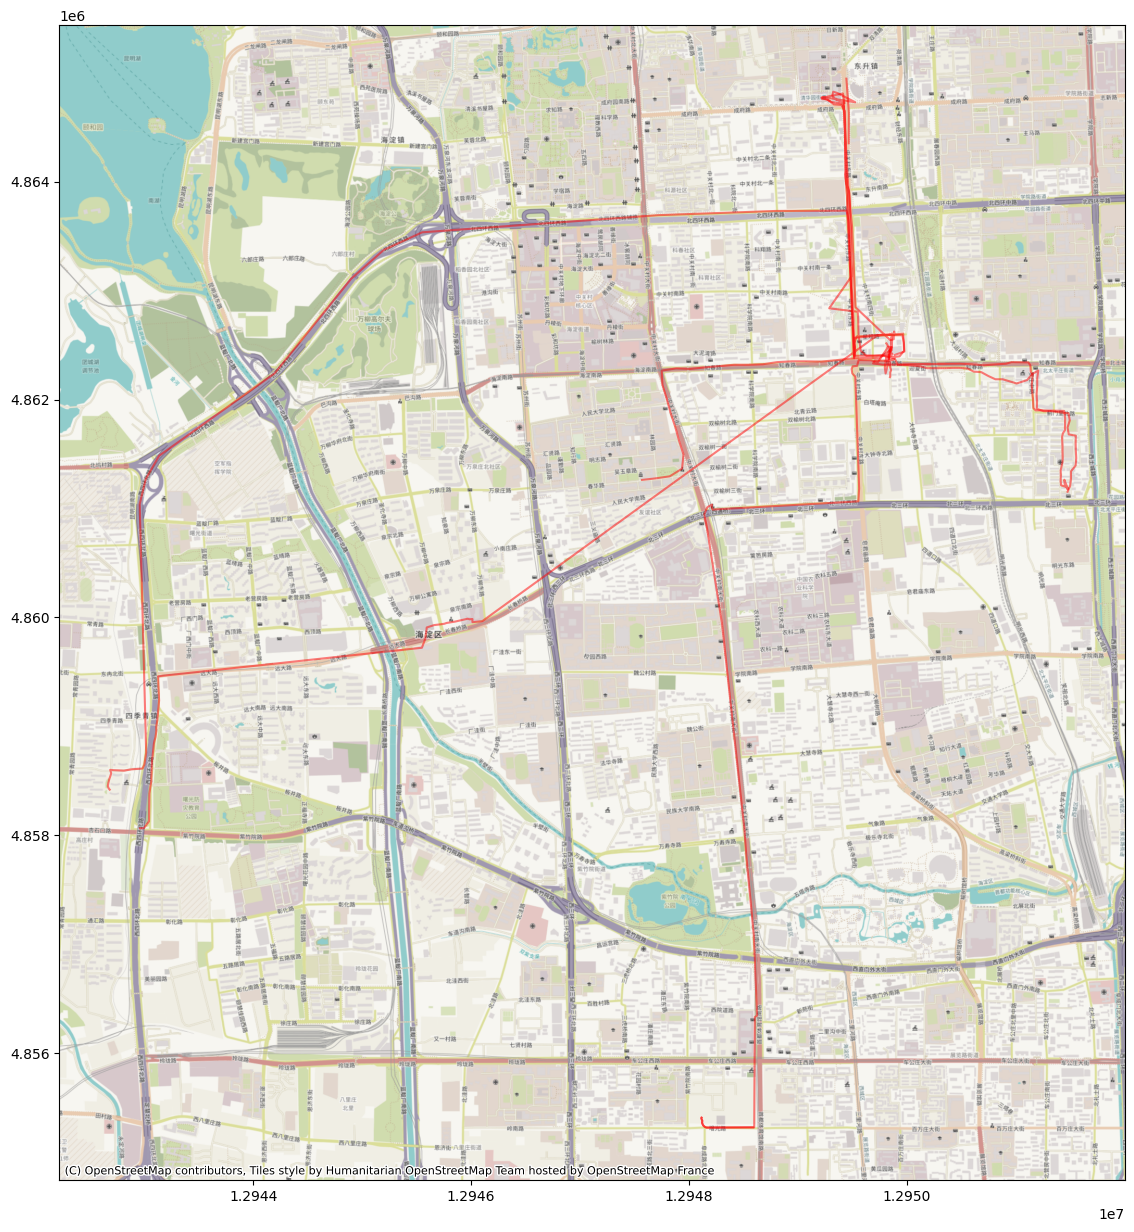

In [38]:
neigh_wm = geolife_list_geometry.iloc[:10].to_crs(epsg=3857)  # Change crs to web mercator
ax = neigh_wm.plot(figsize=(20, 15), alpha=0.5, edgecolor="r")
contextily.add_basemap(ax, zoom=15)

plt.show()